In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def P(M, T):
    n_points = np.random.poisson(M * T)
    times = np.sort(np.random.uniform(0, T, n_points))
    theta = np.random.uniform(0, M, n_points)
    return times, theta

# Fonction pour générer Phi
def Phi(u, alpha, beta):
    return alpha * np.exp(-beta * u) * (u >= 0)

# Fonction pour calculer R_t
def calculate_Rt(times, losses, u, c, T):
    time_points = np.linspace(0, T, 1000)
    R_t = u + c * time_points  # Richesse initiale + revenu constant
    for i, t_i in enumerate(times):
        R_t[time_points >= t_i] -= losses[i]
    return time_points, R_t

def generate_N1(times, theta, mu, lambda_y):
    N1_times = times[theta <= mu]
    losses_N1 = np.random.exponential(1 / lambda_y, len(N1_times))
    return N1_times, losses_N1

def generate_N2(times, theta, mu, alpha, beta, lambda_y):
    N2_times = []
    for i1, t1 in enumerate(times):
        for i2, t2 in enumerate(times[i1 + 1:], start=i1 + 1):
            if mu < theta[i2] <= mu + Phi(t2 - t1, alpha, beta):
                N2_times.append(t2)
    N2_times = np.array(N2_times)
    losses_N2 = np.random.exponential(1 / lambda_y, len(N2_times))
    return N2_times, losses_N2

# # Paramètres
# T = 20
# M = 10
# mu = 8
# alpha = 15
# beta = 20
# u = 50
# c = 3
# lambda_y = 2

In [31]:


# Définir les paramètres du modèle
M = 5       # Intensité de base pour le processus de Poisson
T = 10      # Temps total
mu = 1.0    # Seuil pour la sélection des événements dans N1
alpha = 0.5 # Intensité de l'effet auto-excitant
beta = 0.2  # Paramètre de décroissance de la fonction mémoire
lambda_y = 2  # Paramètre pour la distribution exponentielle des pertes
u = 100     # Richesse initiale
c = 2       # Taux de prime constant

# Générer les temps des événements et les pertes pour N1 et N2
times, theta = P(M, T)
N1_times, N1_losses = generate_N1(times, theta, mu, lambda_y)
N2_times, N2_losses = generate_N2(times, theta, mu, alpha, beta, lambda_y)

# Combiner N1 et N2 pour obtenir N1 + N2
combined_times = np.sort(np.concatenate([N1_times, N2_times]))
combined_losses = np.concatenate([N1_losses, N2_losses])

# Calcul de R_t pour N1 et N1 + N2
time_points, R_t_N1 = calculate_Rt(N1_times, N1_losses, u, c, T)
_, R_t_combined = calculate_Rt(combined_times, combined_losses, u, c, T)

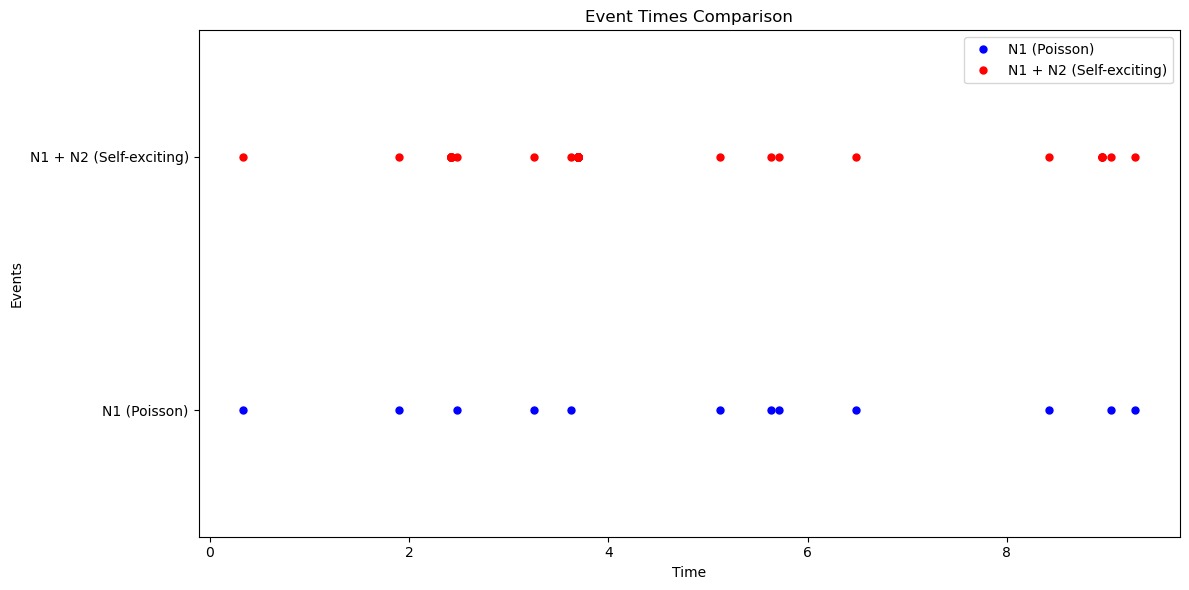

In [32]:
plt.figure(figsize=(12, 6))

# Placer les événements de N1 à une hauteur de 1 (affichés comme des points)
plt.plot(N1_times, np.ones_like(N1_times), 'bo', label='N1 (Poisson)', markersize=5)  # 'bo' = blue circles
# Placer les événements de N1+N2 à une hauteur de 2 (affichés comme des points)
plt.plot(combined_times, np.ones_like(combined_times) + 1, 'ro', label='N1 + N2 (Self-exciting)', markersize=5)  # 'ro' = red circles

# Définir les limites de l'axe des ordonnées pour n'afficher que 1 et 2
plt.yticks([1, 2], ['N1 (Poisson)', 'N1 + N2 (Self-exciting)'])

# Ajuster les limites de l'axe des ordonnées
plt.ylim(0.5, 2.5)  # Limiter l'axe des ordonnées pour n'afficher que 1 et 2

plt.title('Event Times Comparison')
plt.xlabel('Time')
plt.ylabel('Events')
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

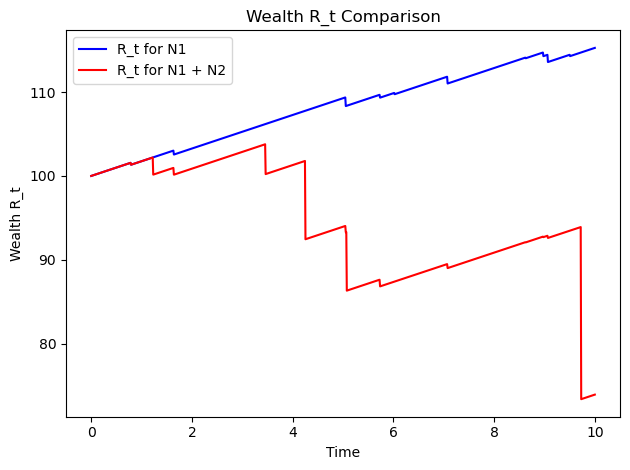

In [14]:
# Visualisation de la richesse R_t
plt.plot(time_points, R_t_N1, label='R_t for N1', color='blue')
plt.plot(time_points, R_t_combined, label='R_t for N1 + N2', color='red')
plt.title('Wealth R_t Comparison')
plt.xlabel('Time')
plt.ylabel('Wealth R_t')
plt.legend()
plt.tight_layout()
plt.show()

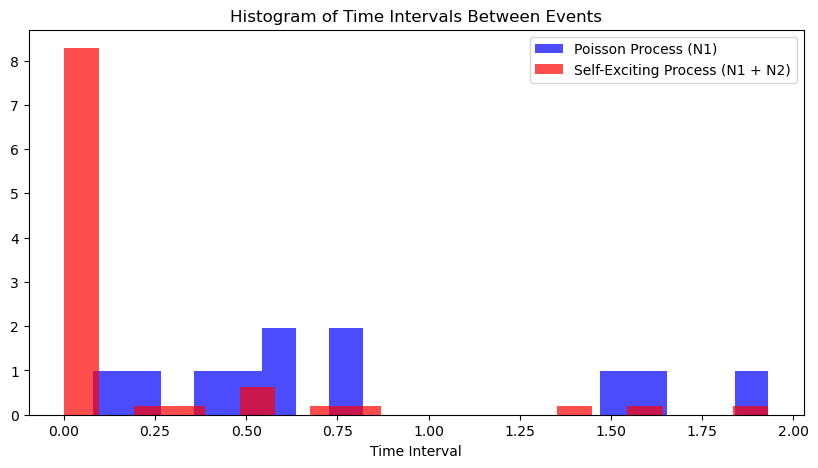

Number of events in N1 (Poisson): 12
Number of events in N1 + N2 (Self-exciting): 51


In [33]:
# Calcul des intervalles entre événements pour N1 et N1 + N2
N1_intervals = np.diff(N1_times)
combined_intervals = np.diff(combined_times)

# Histogrammes des intervalles entre événements
plt.figure(figsize=(10, 5))
plt.hist(N1_intervals, bins=20, alpha=0.7, label='Poisson Process (N1)', color='blue', density=True)
plt.hist(combined_intervals, bins=20, alpha=0.7, label='Self-Exciting Process (N1 + N2)', color='red', density=True)
plt.legend()
plt.xlabel('Time Interval')
plt.title('Histogram of Time Intervals Between Events')
plt.show()

# Calcul de la moyenne et de la variance des événements
N1_count = len(N1_times)
combined_count = len(combined_times)

print(f"Number of events in N1 (Poisson): {N1_count}")
print(f"Number of events in N1 + N2 (Self-exciting): {combined_count}")

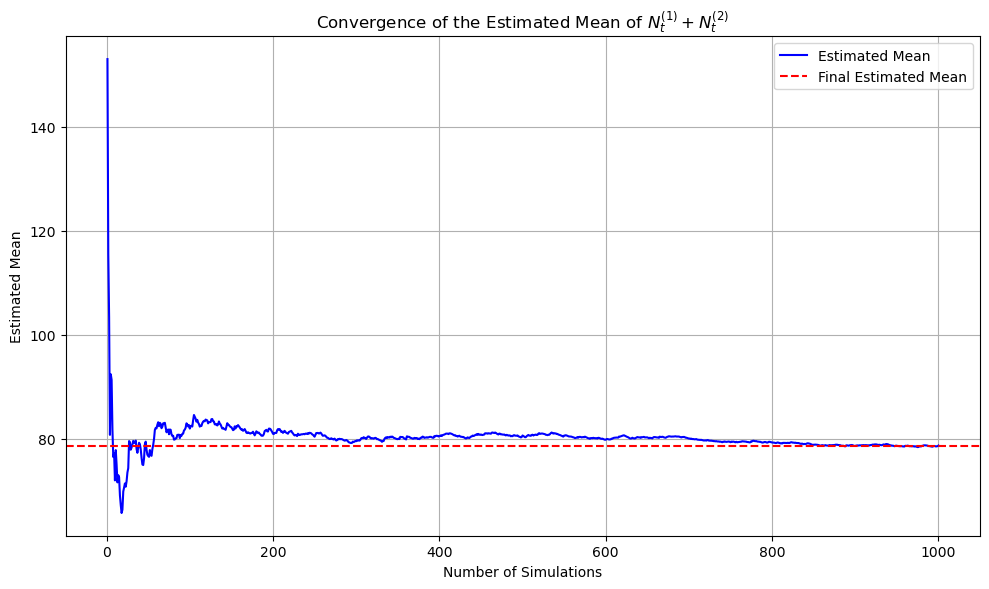

Final estimated mean after 1000 simulations: 78.691


In [37]:
def monte_carlo_estimation(M, T, mu, alpha, beta, lambda_y, num_simulations=1000):
    total_events = 0  # Variable pour accumuler le total des événements
    means = []  # Liste pour stocker les moyennes successives

    for n in range(1, num_simulations + 1):
        # Générer les processus N1 et N2
        times, theta = P(M, T)
        N1_times, N1_losses = generate_N1(times, theta, mu, lambda_y)
        N2_times, N2_losses = generate_N2(times, theta, mu, alpha, beta, lambda_y)
        
        # Calculer N1 + N2
        combined_times = np.sort(np.concatenate([N1_times, N2_times]))
        
        # Ajouter le nombre d'événements de cette simulation au total
        total_events += len(combined_times)
        
        # Estimer la moyenne au fur et à mesure de la simulation
        current_mean = total_events / n
        means.append(current_mean)
    
    return means

# Paramètres du modèle
M = 5       # Intensité de base pour le processus de Poisson
T = 10      # Temps total
mu = 1.0    # Seuil pour la sélection des événements dans N1
alpha = 0.5 # Intensité de l'effet auto-excitant
beta = 0.2  # Paramètre de décroissance de la fonction mémoire
lambda_y = 2  # Paramètre pour la distribution exponentielle des pertes

# Nombre de simulations Monte-Carlo
num_simulations = 1000

# Estimation de la moyenne avec la convergence
means = monte_carlo_estimation(M, T, mu, alpha, beta, lambda_y, num_simulations)

# Tracé de la convergence de la moyenne
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), means, label='Estimated Mean', color='blue')
plt.axhline(y=np.mean(means[-1]), color='red', linestyle='--', label='Final Estimated Mean')
plt.title('Convergence of the Estimated Mean of $N_t^{(1)} + N_t^{(2)}$')
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Final estimated mean after {num_simulations} simulations: {means[-1]}")

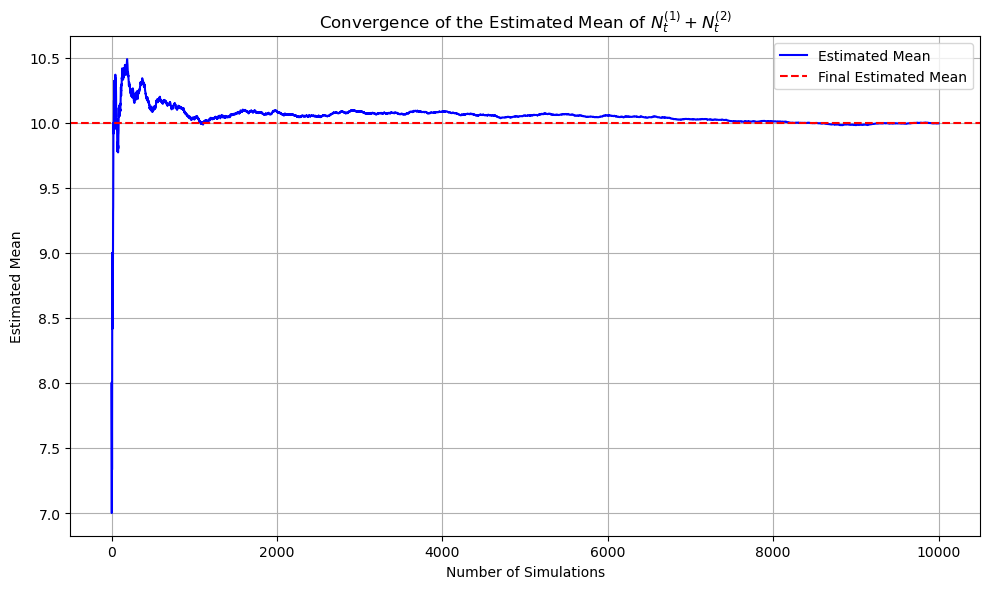

In [36]:
def monte_carlo_estimation(M, T, mu, alpha, beta, lambda_y, num_simulations=1000):
    total_events = 0  # Variable pour accumuler le total des événements
    means = []  # Liste pour stocker les moyennes successives

    for n in range(1, num_simulations + 1):
        # Générer les processus N1 et N2
        times, theta = P(M, T)
        N1_times, N1_losses = generate_N1(times, theta, mu, lambda_y)
        
        # Calculer N1 + N2
        combined_times = np.sort(np.concatenate([N1_times]))
        
        # Ajouter le nombre d'événements de cette simulation au total
        total_events += len(combined_times)
        
        # Estimer la moyenne au fur et à mesure de la simulation
        current_mean = total_events / n
        means.append(current_mean)
    
    return means

# Paramètres du modèle
M = 5       # Intensité de base pour le processus de Poisson
T = 10      # Temps total
mu = 1.0    # Seuil pour la sélection des événements dans N1
alpha = 0.5 # Intensité de l'effet auto-excitant
beta = 0.2  # Paramètre de décroissance de la fonction mémoire
lambda_y = 2  # Paramètre pour la distribution exponentielle des pertes

# Nombre de simulations Monte-Carlo
num_simulations = 10000

# Estimation de la moyenne avec la convergence
means = monte_carlo_estimation(M, T, mu, alpha, beta, lambda_y, num_simulations)

# Tracé de la convergence de la moyenne
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), means, label='Estimated Mean', color='blue')
plt.axhline(y=np.mean(means[-1]), color='red', linestyle='--', label='Final Estimated Mean')
plt.title('Convergence of the Estimated Mean of $N_t^{(1)} + N_t^{(2)}$')
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Monte-Carlo pour estimer la moyenne de Rt

In [58]:
n_simulations = 10000  # Nombre de simulations Monte-Carlo

# Initialisation des variables pour stocker les résultats
mean_Rt = np.zeros(1000)
mean_Rt_progression = []
mean_Rt_P = np.zeros(1000)
mean_Rt_progression_P = []

# Simulation Monte-Carlo
for sim in range(n_simulations):
    # Génération de N_t^(1)
    n_points = np.random.poisson(M * T)
    times = np.sort(np.random.uniform(0, T, n_points))
    theta = np.random.uniform(0, M, n_points)
    
    N1_times, losses_N1 = generate_N1(times, theta, mu, lambda_y)
    N2_times, losses_N2 = generate_N2(times, theta, mu, alpha, beta, lambda_y)
    time_points, R_t_N1 = calculate_Rt(N1_times, losses_N1, u, c, T)
    _, R_t_N_total = calculate_Rt(np.sort(np.concatenate([N1_times, N2_times])),
                              np.concatenate([losses_N1, losses_N2]), u, c, T)

    # Ajouter à la somme pour calculer la moyenne plus tard
    mean_Rt += R_t_N_total
    mean_Rt_P += R_t_N1
    
    # Stocker la progression de la moyenne à chaque itération
    mean_Rt_progression.append(mean_Rt / (sim + 1))
    mean_Rt_progression_P.append(mean_Rt_P / (sim + 1))

# Moyenne finale
mean_Rt /= n_simulations
mean_Rt_P /= n_simulations

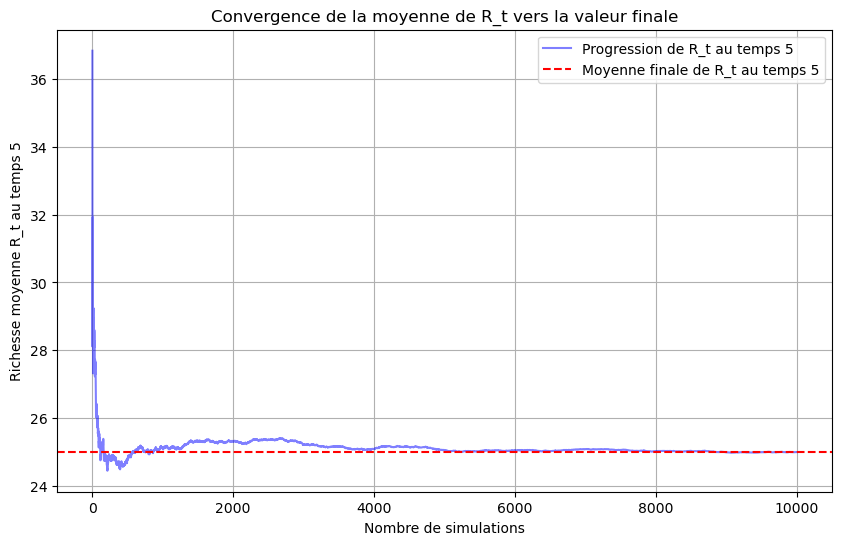

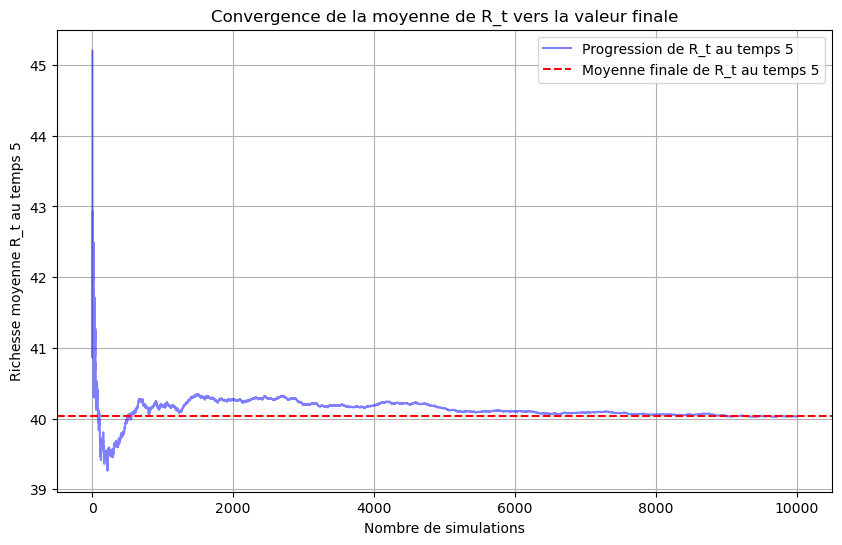

In [59]:
# Tracer la convergence de la moyenne de R_t en fonction du nombre de simulations
plt.figure(figsize=(10, 6))

# Tracer les courbes de la progression de la moyenne
plt.plot(range(1, n_simulations + 1), [mean_Rt_progression[i][500] for i in range(n_simulations)], label="Progression de R_t au temps 5 ", color='blue', alpha=0.5)
# Tracer la moyenne finale
plt.axhline(y=mean_Rt[500], color='red', linestyle='--', label="Moyenne finale de R_t au temps 5")

plt.xlabel("Nombre de simulations")
plt.ylabel("Richesse moyenne R_t au temps 5")
plt.title("Convergence de la moyenne de R_t vers la valeur finale")
plt.legend()
plt.grid(True)
plt.show()

# Tracer la convergence de la moyenne de R_t en fonction du nombre de simulations
plt.figure(figsize=(10, 6))

# Tracer les courbes de la progression de la moyenne
plt.plot(range(1, n_simulations + 1), [mean_Rt_progression_P[i][500] for i in range(n_simulations)], label="Progression de R_t au temps 5 ", color='blue', alpha=0.5)
# Tracer la moyenne finale
plt.axhline(y=mean_Rt_P[500], color='red', linestyle='--', label="Moyenne finale de R_t au temps 5")

plt.xlabel("Nombre de simulations")
plt.ylabel("Richesse moyenne R_t au temps 5")
plt.title("Convergence de la moyenne de R_t vers la valeur finale")
plt.legend()
plt.grid(True)
plt.show()

# Monte-Carlo pour estimer la probabilité de ruine

In [64]:
n_simulations = 100000  # Nombre de simulations Monte-Carlo

# Initialisation des variables pour stocker les résultats
ruin_count = 0
ruin_progression = []
ruin_count_P = 0
ruin_progression_P = []

# Simulation Monte-Carlo avec Importance Sampling
for sim in range(n_simulations):
    # Génération de N_t^(1)
    n_points = np.random.poisson(M * T)
    times = np.sort(np.random.uniform(0, T, n_points))
    theta = np.random.uniform(0, M, n_points)
    
    N1_times, losses_N1 = generate_N1(times, theta, mu, lambda_y)
    N2_times, losses_N2 = generate_N2(times, theta, mu, alpha, beta, lambda_y)
    time_points, R_t_N1 = calculate_Rt(N1_times, losses_N1, u, c, T)

    # Calcul de R_t^(1) et R_t total
    _, R_t_N1 = calculate_Rt(N1_times, losses_N1, u, c, T)
    _, R_t_N_total = calculate_Rt(np.sort(np.concatenate([N1_times, N2_times])),
                                  np.concatenate([losses_N1, losses_N2]), u, c, T)

    # Vérifier si la richesse est devenue négative (ruine)
    if np.any(R_t_N_total < 0):  # Si R_t devient négatif à un instant donné
        ruin_count += 1
    if np.any(R_t_N1 < 0):  # Si R_t devient négatif à un instant donné
        ruin_count_P += 1

    # Stocker la probabilité de ruine après cette itération
    ruin_progression.append(ruin_count / (sim + 1))
    ruin_progression_P.append(ruin_count_P / (sim + 1))

# Affichage de la probabilité de ruine après toutes les simulations
ruin_probability = ruin_count / n_simulations
ruin_probability_P = ruin_count_P / n_simulations
print(f"Probabilité de ruine estimée (self-exciting): {ruin_probability:.4f}")
print(f"Probabilité de ruine estimée (Poisson): {ruin_probability_P:.4f}")

Probabilité de ruine estimée (self-exciting): 0.5084
Probabilité de ruine estimée (Poisson): 0.0011


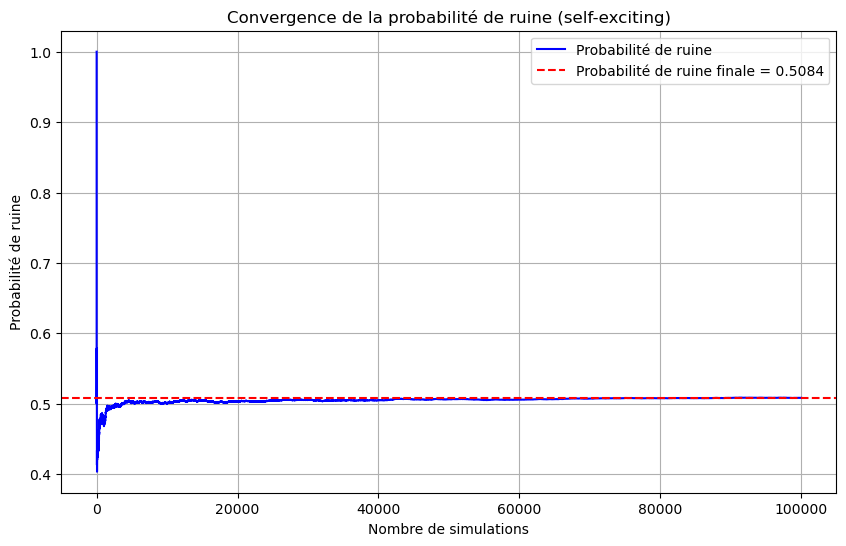

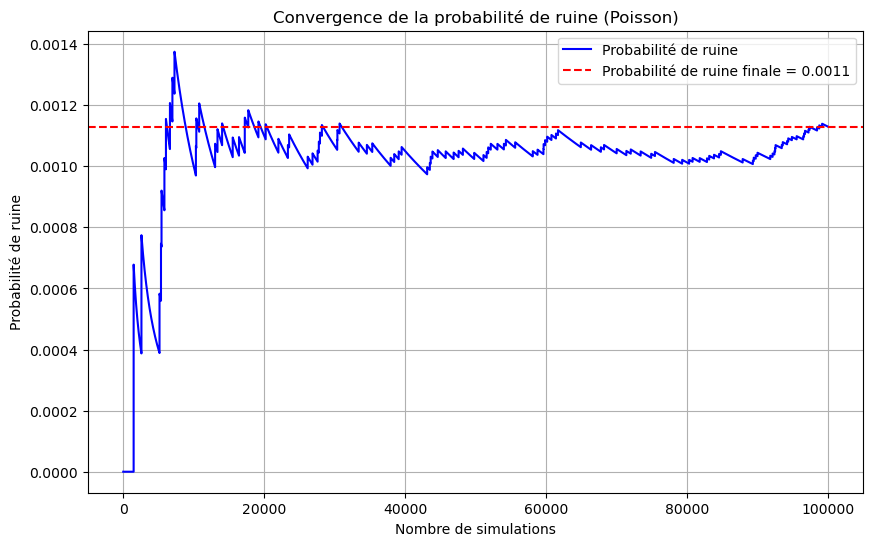

In [65]:
# Tracer la probabilité de ruine en fonction du nombre de simulations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_simulations + 1), ruin_progression, label="Probabilité de ruine", color='blue')
plt.axhline(y=ruin_probability, color='red', linestyle='--', label=f"Probabilité de ruine finale = {ruin_probability:.4f}")
plt.xlabel("Nombre de simulations")
plt.ylabel("Probabilité de ruine")
plt.title("Convergence de la probabilité de ruine (self-exciting)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_simulations + 1), ruin_progression_P, label="Probabilité de ruine", color='blue')
plt.axhline(y=ruin_probability_P, color='red', linestyle='--', label=f"Probabilité de ruine finale = {ruin_probability_P:.4f}")
plt.xlabel("Nombre de simulations")
plt.ylabel("Probabilité de ruine")
plt.title("Convergence de la probabilité de ruine (Poisson)")
plt.legend()
plt.grid(True)
plt.show()